# ДЗ №5
Частичная проблема собственных чисел

In [79]:
import numpy as np
from numpy.linalg import norm
import seaborn as sns
from tqdm import tqdm
from typing import Tuple

In [80]:
def max_relation_coef(x1, x2) -> float:
    abs_relation = np.abs(x1 / x2)
    return np.max(abs_relation) - np.min(abs_relation)

In [89]:
from abc import abstractmethod

class IterationMethod:
    def __init__(self, A, eps):
        self.error_trace = None
        self.n_iterations = None
        self.A = A
        self.eps = eps
        self.x, self.answer = self.solve()

    def solve(self) -> Tuple[np.ndarray, float]:
        norm_coef = 1
        x, answer = self.iterative_process(self.A)
        while answer > 1:
            norm_coef += 1
            self.reset()
            x, answer = self.iterative_process(self.A / norm_coef)
        return x, answer * norm_coef

    def iterative_process(self, A: np.ndarray) -> Tuple[np.ndarray, float]:
        self.error_trace = []
        self.n_iterations = 0
        x, new_answer = self.update_answer(A)
        prev_answer = new_answer + self.eps + 1
        while abs(new_answer - prev_answer) > self.eps:
            prev_answer = new_answer
            x, new_answer = self.update_answer(A)
            self.n_iterations += 1
            self.error_trace.append(abs(new_answer - prev_answer))
        return x, new_answer


    @abstractmethod
    def update_answer(self, A: np.ndarray) -> Tuple[np.ndarray, float]:
        ...

    @abstractmethod
    def reset(self):
        ...

In [96]:
class SimpleIterationMethod(IterationMethod):
    def __init__(self, A, eps=10**(-12)):
        n = A.shape[0]
        self.x = np.ones(n)
        super().__init__(A, eps)

    def update_answer(self, A: np.ndarray) -> Tuple[np.ndarray, float]:
        new_x = np.matmul(A, self.x)
        new_alpha = norm(new_x) / norm(self.x)
        self.x = new_x
        return new_x, new_alpha

    def reset(self):
        self.x = np.ones(self.A.shape[0])

In [88]:
A = np.array([
    [1, 5, 7],
    [2, 1, 0],
    [4, 2, 9]
])

simple = SimpleIterationMethod(-A)
simple.answer

-12.020066612059193

In [65]:
class ScalarIterationMethod(IterationMethod):
    def __init__(self, A, eps=10**(-12)):
        n = A.shape[0]
        self.x = np.ones(n)
        self.y = np.ones(n)
        super().__init__(A, eps)

    def update_answer(self, A: np.ndarray) -> Tuple[np.ndarray, float]:
        new_x = np.matmul(A, self.x)
        new_y = np.matmul(A.T, self.y)
        new_alpha = np.dot(new_x, new_y) / np.dot(self.x, new_y)
        self.y = new_y
        self.x = new_x
        return new_x, new_alpha

    def reset(self):
        self.x = np.ones(self.A.shape[0])
        self.y = np.ones(self.A.shape[0])

In [66]:
scalar_method = ScalarIterationMethod(A)
scalar_method.n_iterations

10

# Зависимость числа итераций от метода

In [67]:
from scipy.linalg import hilbert

In [104]:
H = hilbert(10)

In [105]:
simple_method = SimpleIterationMethod(H)
scalar_method = ScalarIterationMethod(H)

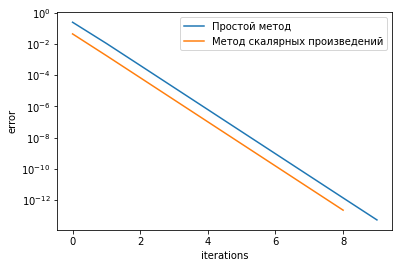

In [106]:
ax1 = sns.lineplot(x=range(simple_method.n_iterations), y=simple_method.error_trace, label='Простой метод')
ax2 = sns.lineplot(x=range(scalar_method.n_iterations), y=scalar_method.error_trace, label='Метод скалярных произведений')
st = ax2.set(yscale='log',xlabel='iterations', ylabel='error')